# **Exploratory Data Analysis Lab**


## Objectives


*   Identifying the distribution of data in the dataset.

*   Identifying outliers in the dataset.

*   Removing outliers from the dataset.

*   Identifying correlation between features in the dataset.


***


Importing the pandas module.


In [16]:
import pandas as pd

Loading the dataset into a dataframe.


In [17]:
df = pd.read_csv("m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plotting the distribution curve for the column `ConvertedComp`.


Text(0.5, 0, 'ConvertedComp')

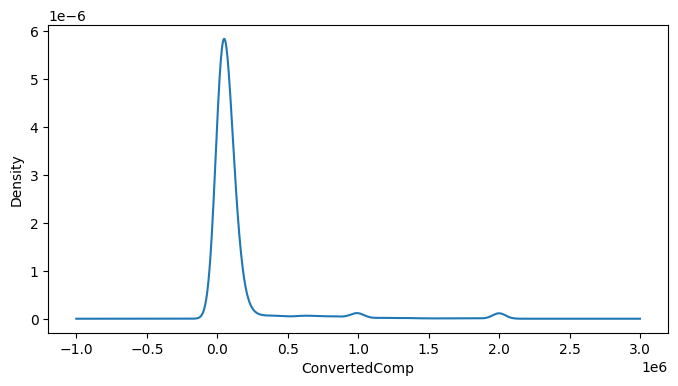

In [18]:

ax = df['ConvertedComp'].plot(kind='kde', figsize=(8,4))
ax.set_xlabel('ConvertedComp')


Plotting the histogram for the column `ConvertedComp`.


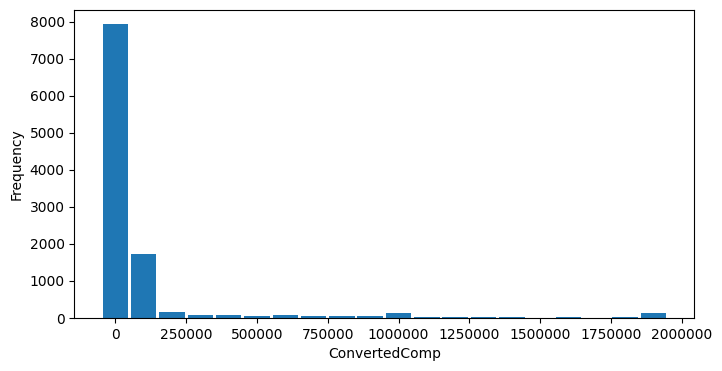

In [19]:

ax = df['ConvertedComp'].plot(kind='hist', figsize=(8,4), bins=20, rwidth=0.9, align='left')
ax.set_xlabel('ConvertedComp')
ax.ticklabel_format(style='plain')


Finding median of the column `ConvertedComp`.


In [20]:

df['ConvertedComp'].median()

57745.0

Finding responders that identified themselves only as a **Man**.


In [21]:

df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Finding out the  median ConvertedComp of responders identified themselves only as a **Woman**.


In [22]:

df_w = df[df['Gender'] == 'Woman']
df_w['ConvertedComp'].median()

57708.0

Finding summary for the column `Age`.


In [23]:

print('Min' + ' : ' + str(df['Age'].min()))
print('Q1' + ' : ' + str(df['Age'].quantile(.25)))
print('Median' + ' : ' + str(df['Age'].median()))
print('Q3' + ' : ' + str(df['Age'].quantile(.75)))
print('Max' + ' : ' + str(df['Age'].max()))


Min : 16.0
Q1 : 25.0
Median : 29.0
Q3 : 35.0
Max : 99.0


Plotting a histogram of the column `Age`.


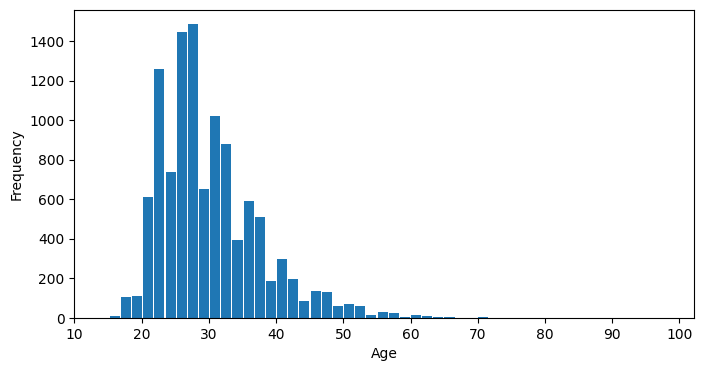

In [24]:

ax = df['Age'].plot(kind='hist', figsize=(8,4), bins=50, xticks=[10,20,30,40,50,60,70,80,90,100], rwidth=0.9, align='left')
ax.set_xlabel('Age')
ax.ticklabel_format(style='plain')


## Outliers


### Finding outliers


Finding out if outliers exist in the column `ConvertedComp` using a box plot.


<AxesSubplot:>

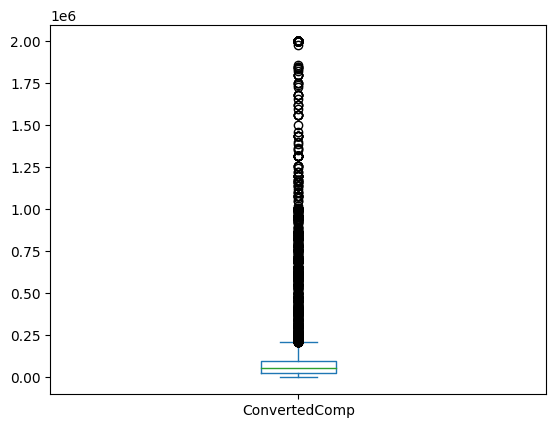

In [25]:

df['ConvertedComp'].plot(kind='box')

Finding out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:

Q1 = df['ConvertedComp'].quantile(.25)
Q3 = df['ConvertedComp'].quantile(.75)

IQR = Q3 - Q1

Finding out the upper and lower bounds.


In [27]:

upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

print('upper_bound : ' + str(upper_bound))
print('lower_bound : ' + str(lower_bound))


upper_bound : 209698.0
lower_bound : -82830.0


Identifying how many outliers are there in the `ConvertedComp` column.


In [28]:

df[(df['ConvertedComp'] >= upper_bound) | (df['ConvertedComp'] <= lower_bound)].count().max()

879

Creating a new dataframe by removing the outliers from the `ConvertedComp` column.


In [29]:

new_df = df[(df['ConvertedComp'] < upper_bound) & (df['ConvertedComp'] > lower_bound)]
new_df['ConvertedComp'].describe().round(3)

count      9703.000
mean      59883.208
std       43394.337
min           0.000
25%       24060.000
50%       52704.000
75%       85574.500
max      209356.000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


In [30]:

new_df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
